### Capstone Project

### Problem statement

A house value is simply more than location and square footage. Like the features that make up a person, an educated party would want to know all aspects that give a house its value. 
For example, you want to sell a house and you don’t know the price which you can take — it can’t be too low or too high. 
To find house price you usually try to find similar properties in your neighbourhood and based on gathered data you will try to assess your house price.

We will use pandas, scikit-learn to load and explore the dataset. We should focus on the statistical analysis which will provide information about Outliers and other variables.

In [1]:
# Importing all the required libraries 


import numpy as np # linearalgebra
import pandas as pd # dataprocessing
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('innercity.csv', delimiter=',')
df1.dataframeName = 'innercity.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 21613 rows and 23 columns


In [3]:
df1.head(5)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [4]:
df1["dayhours"]=pd.to_datetime(df1['dayhours'])
df1.head(5)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,2014-11-07,808100,4,3.25,3020,13457,1.0,0,0,...,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,2014-12-04,277500,4,2.50,2550,7500,1.0,0,0,...,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,2015-04-20,404000,3,2.50,2370,4324,2.0,0,0,...,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,2014-05-29,300000,2,1.00,820,3844,1.0,0,0,...,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,2015-04-24,699000,2,1.50,1400,4050,1.0,0,0,...,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [5]:
df1.sort_values('yr_built',inplace=True)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 4792 to 20915
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   dayhours          21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21613 non-null  int64         
 4   room_bath         21613 non-null  float64       
 5   living_measure    21613 non-null  int64         
 6   lot_measure       21613 non-null  int64         
 7   ceil              21613 non-null  float64       
 8   coast             21613 non-null  int64         
 9   sight             21613 non-null  int64         
 10  condition         21613 non-null  int64         
 11  quality           21613 non-null  int64         
 12  ceil_measure      21613 non-null  int64         
 13  basement          21613 non-null  int64         
 14  yr_built          2

In [7]:
df1.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [8]:
df1.isnull().any()

cid                 False
dayhours            False
price               False
room_bed            False
room_bath           False
living_measure      False
lot_measure         False
ceil                False
coast               False
sight               False
condition           False
quality             False
ceil_measure        False
basement            False
yr_built            False
yr_renovated        False
zipcode             False
lat                 False
long                False
living_measure15    False
lot_measure15       False
furnished           False
total_area          False
dtype: bool

In [9]:
df1.isna().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [10]:
print('Max-'+ str(df1['zipcode'].max()) +' Min-'+str(df1['zipcode'].min()) +
' Range-'+str(df1['zipcode'].max()-df1['zipcode'].min()))#getting the range of zipcodes

Max-98199 Min-98001 Range-198


In [11]:
#dividing the zip codes based on region codes of 1-10

df1['region code']=int(0)
for index,row in df1.iterrows():
    if row["zipcode"]%1000 in range(0,20):
        df1.at[index,'region code'] =int(1)
    elif row["zipcode"]%1000 in range(20,40):
        df1.at[index,'region code'] =int(2)
    elif row["zipcode"]%1000 in range(40,60):
        df1.at[index,'region code'] =int(3)
    elif row["zipcode"]%1000 in range(60,80):
        df1.at[index,'region code'] =int(4)
    elif row["zipcode"]%1000 in range(80,100):
        df1.at[index,'region code'] =int(5)
    elif row["zipcode"]%1000 in range(100,120):
        df1.at[index,'region code'] =int(6)
    elif row["zipcode"]%1000 in range(120,140):
        df1.at[index,'region code'] =int(7)
    elif row["zipcode"]%1000 in range(140,160):
        df1.at[index,'region code'] =int(8)
    elif row["zipcode"]%1000 in range(160,180):
        df1.at[index,'region code'] =int(9)
    elif row["zipcode"]%1000 in range(180,200):
        df1.at[index,'region code'] =int(10)

In [12]:
df1['region code'].value_counts()

6     4259
2     4102
3     3627
1     2857
7     1811
4     1699
8     1134
9     1040
10     733
5      351
Name: region code, dtype: int64

In [13]:
df1[df1['region code']==int(0)]['region code']#Checking for any missed values

Series([], Name: region code, dtype: int64)

In [14]:
df1[["zipcode","region code"]].head(20)

,zipcode,region code
4792,98122,7
6973,98065,4
1778,98108,6
21242,98144,8
10241,98122,7
10343,98107,6
17092,98022,2
17081,98118,6
17050,98112,6
16857,98027,2


In [15]:
#Getting the measure of how old is the house
df1['years old']=int(0)
for index,row in df1.iterrows():
    df1.at[index,'years old']=int(row['dayhours'].strftime('%Y'))-row['yr_built']
    
df1[['years old']].head()

,years old
4792,114
6973,114
1778,114
21242,114
10241,114


In [16]:
#Getting the measure of how long the house has not been renovated
df1['is_renovated'] =int(0)
for index,row in df1.iterrows():
    if row['yr_renovated']!=int(0):
        df1.at[index,'is_renovated']=int(1)
    
df1[['yr_built','yr_renovated','is_renovated']].head(20)

,yr_built,yr_renovated,is_renovated
4792,1900,0,0
6973,1900,2000,1
1778,1900,0,0
21242,1900,0,0
10241,1900,0,0
10343,1900,2013,1
17092,1900,2001,1
17081,1900,1988,1
17050,1900,0,0
16857,1900,0,0


In [17]:
boundaries=(df1["long"].min(),df1["long"].max(),df1["lat"].min(),df1["lat"].max())#boundaries of the area where houses reside
boundaries

(-122.51899999999999, -121.315, 47.1559, 47.7776)

In [18]:
img = plt.imread('Map.png')#Image of the map of the area from google maps

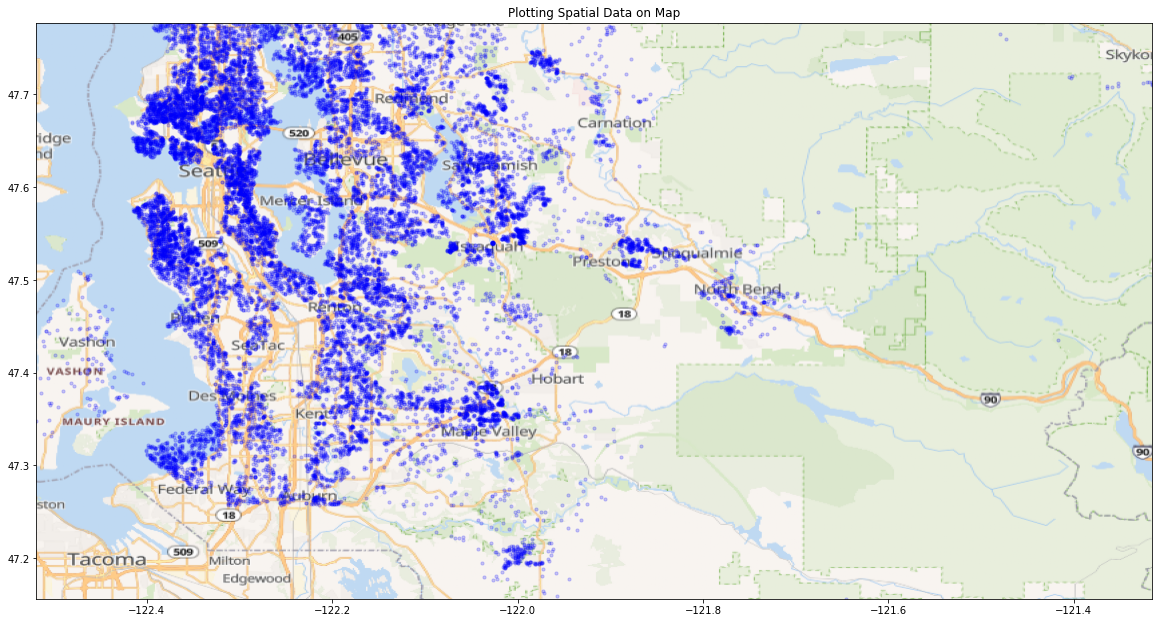

In [19]:
 #plotting house points on the map
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df1.long, df1.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Map')
ax.set_xlim(boundaries[0],boundaries[1])
ax.set_ylim(boundaries[2],boundaries[3])
ax.imshow(img, zorder=0, extent = boundaries, aspect= 'equal')

In [20]:
#Dropping unnecessary columns
df1.drop(['cid','dayhours','yr_built','yr_renovated','lat','long','zipcode'],axis=1,inplace=True)

In [21]:
#Getting numerical dataframe
df_num=df1[['price','room_bed','room_bath','living_measure','lot_measure','sight','ceil_measure',
'basement','living_measure15','lot_measure15','total_area','years old']]

df_num.head()

,price,room_bed,room_bath,living_measure,lot_measure,sight,ceil_measure,basement,living_measure15,lot_measure15,total_area,years old
4792,759000,3,2.75,1960,6390,2,1960,0,2440,5870,8350,114
6973,550000,5,1.00,2150,262231,0,2150,0,1460,46609,264381,114
1778,240000,3,2.00,1330,6000,0,630,700,1140,6000,7330,114
21242,500000,4,2.00,1680,3813,0,1680,0,2540,3996,5493,114
10241,415000,1,1.00,760,3000,0,760,0,1270,3000,3760,114


In [22]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0,321950.00,450000.00,645000.0,7700000.0
room_bed,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
room_bath,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
living_measure,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
lot_measure,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
sight,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
ceil_measure,21613.0,1788.390691,828.090978,290.0,1190.00,1560.00,2210.0,9410.0
basement,21613.0,291.509045,442.575043,0.0,0.00,0.00,560.0,4820.0
living_measure15,21613.0,1986.552492,685.391304,399.0,1490.00,1840.00,2360.0,6210.0
lot_measure15,21613.0,12768.455652,27304.179631,651.0,5100.00,7620.00,10083.0,871200.0


# Now, we will understand the statistical summary of the dataset using the describe() function. 
# we can understand the count, min, max, mean and standard deviation for each attribute (column) in the dataset.

# Exploratory Analysis

In [23]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 10 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'r')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


# Correlation

In [24]:
# Finding correlation between attributes is a highly useful way to check for patterns in the dataset. 
# The output of each of these correlation functions fall within the range [-1, 1].
# We will use df.corr() function to compute the correlation between attributes

In [25]:
df_num.corr()

,price,room_bed,room_bath,living_measure,lot_measure,sight,ceil_measure,basement,living_measure15,lot_measure15,total_area,years old
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.397346,0.605566,0.323837,0.585374,0.082456,0.104796,-0.053921
room_bed,0.308338,1.000000,0.515884,0.576671,0.031703,0.079532,0.477600,0.303093,0.391638,0.029244,0.044310,-0.154324
room_bath,0.525134,0.515884,1.000000,0.754665,0.087740,0.187737,0.685342,0.283770,0.568634,0.087175,0.104050,-0.506407
living_measure,0.702044,0.576671,0.754665,1.000000,0.172826,0.284611,0.876597,0.435043,0.756420,0.183286,0.194209,-0.318488
lot_measure,0.089655,0.031703,0.087740,0.172826,1.000000,0.074710,0.183512,0.015286,0.144608,0.718557,0.999763,-0.052990
sight,0.397346,0.079532,0.187737,0.284611,0.074710,1.000000,0.167649,0.276947,0.280439,0.072575,0.080693,0.053458
ceil_measure,0.605566,0.477600,0.685342,0.876597,0.183512,0.167649,1.000000,-0.051943,0.731870,0.194050,0.202127,-0.424248
basement,0.323837,0.303093,0.283770,0.435043,0.015286,0.276947,-0.051943,1.000000,0.200355,0.017276,0.024832,0.132865
living_measure15,0.585374,0.391638,0.568634,0.756420,0.144608,0.280439,0.731870,0.200355,1.000000,0.183192,0.160727,-0.326552
lot_measure15,0.082456,0.029244,0.087175,0.183286,0.718557,0.072575,0.194050,0.017276,0.183192,1.000000,0.719692,-0.070954


In [26]:
# We will cover 3 methods

### KENDALL CORRELATION

Text(0.5, 1.0, 'KENDALL CORRELATION')

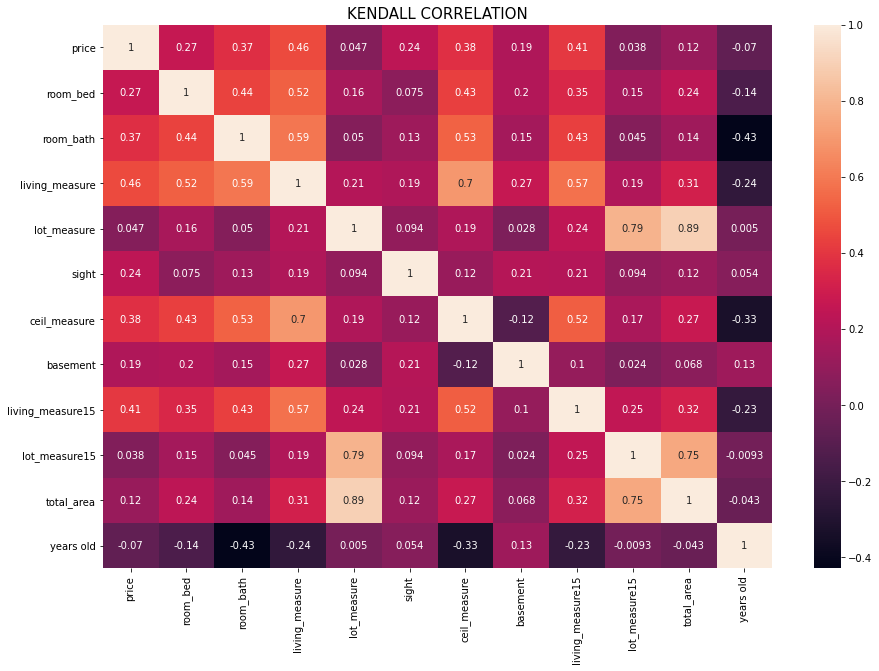

In [27]:
plt.figure(figsize = (15,10))
sns.heatmap(df_num.corr(method="kendall"),annot=True)
plt.title('KENDALL CORRELATION', fontsize=15)

Text(0.5, 1.0, 'PEARSON CORRELATION')

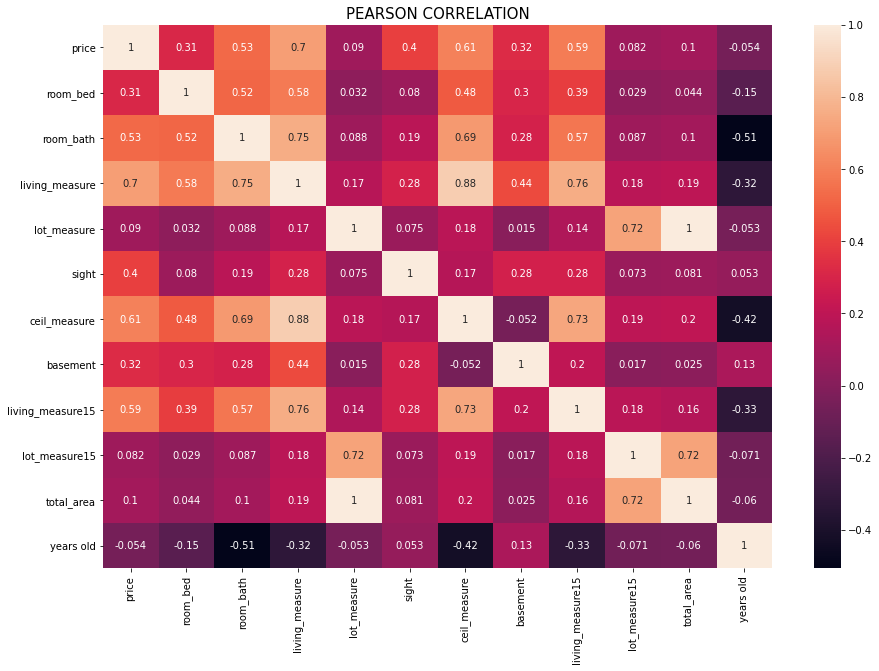

In [28]:
plt.figure(figsize = (15,10))
sns.heatmap(df_num.corr(method="pearson"),annot=True)
plt.title('PEARSON CORRELATION', fontsize=15)

##### Inference:

ceil_measure is correlated with living_measure

ceil_measure is correlated with living_measure15

living_measure is correlated with living_measure15

lot_measure is correlated with lot_measure15

drop the following independent variable ceil_measure ,living_measure15, lot_measure15 to remove multicollinearity.

### SPEARMAN CORRELATION

Text(0.5, 1.0, 'SPEARMAN CORRELATION')

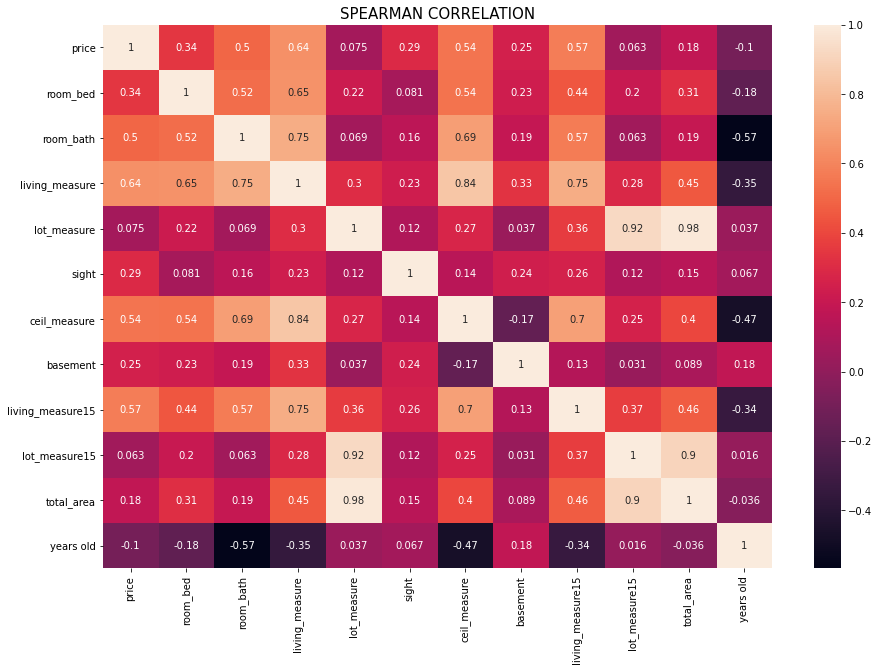

In [29]:

plt.figure(figsize = (15,10))
sns.heatmap(df_num.corr(method="spearman"),annot=True)
plt.title('SPEARMAN CORRELATION', fontsize=15)

# Visualize the dataset


Now you're ready to read in the data and use the plotting functions to visualize the data.

We will use two types of visualization strategy namely univariate plots and bivariate plots. 
As the name suggests, univariate plot is used to visualize a single column or an attribute whereas bivariate plot is used to visualize two columns or two attributes.


### Box plot

In [30]:
# A box-whisker plot is a univariate plot used to visualize a data distribution.
# The central line in the box is the median of the entire data distribution.
# The right and left edges in the box are the medians of data distribution to the right and left from the central median.

<AxesSubplot:>

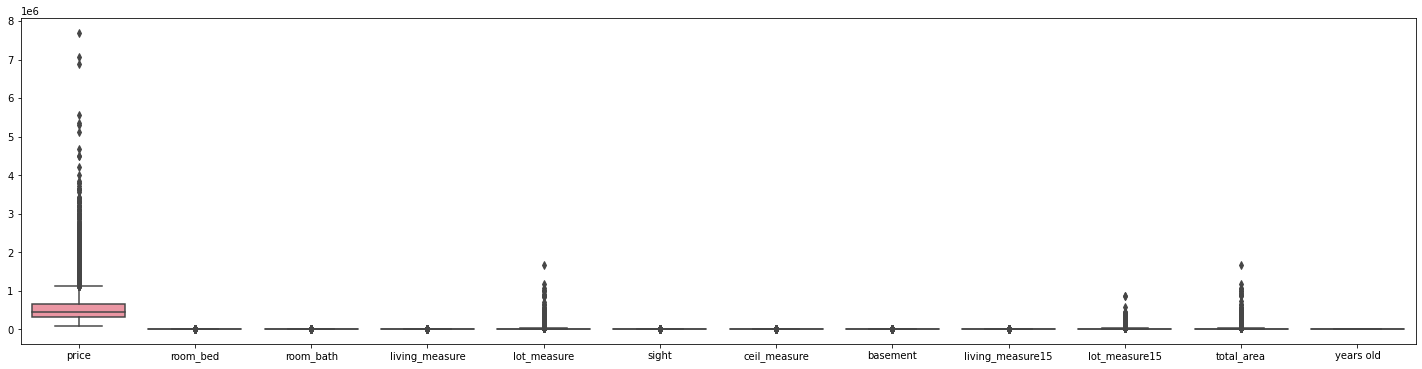

In [31]:
%matplotlib inline


plt.figure(figsize = (25,6))
sns.boxplot(data=df_num)

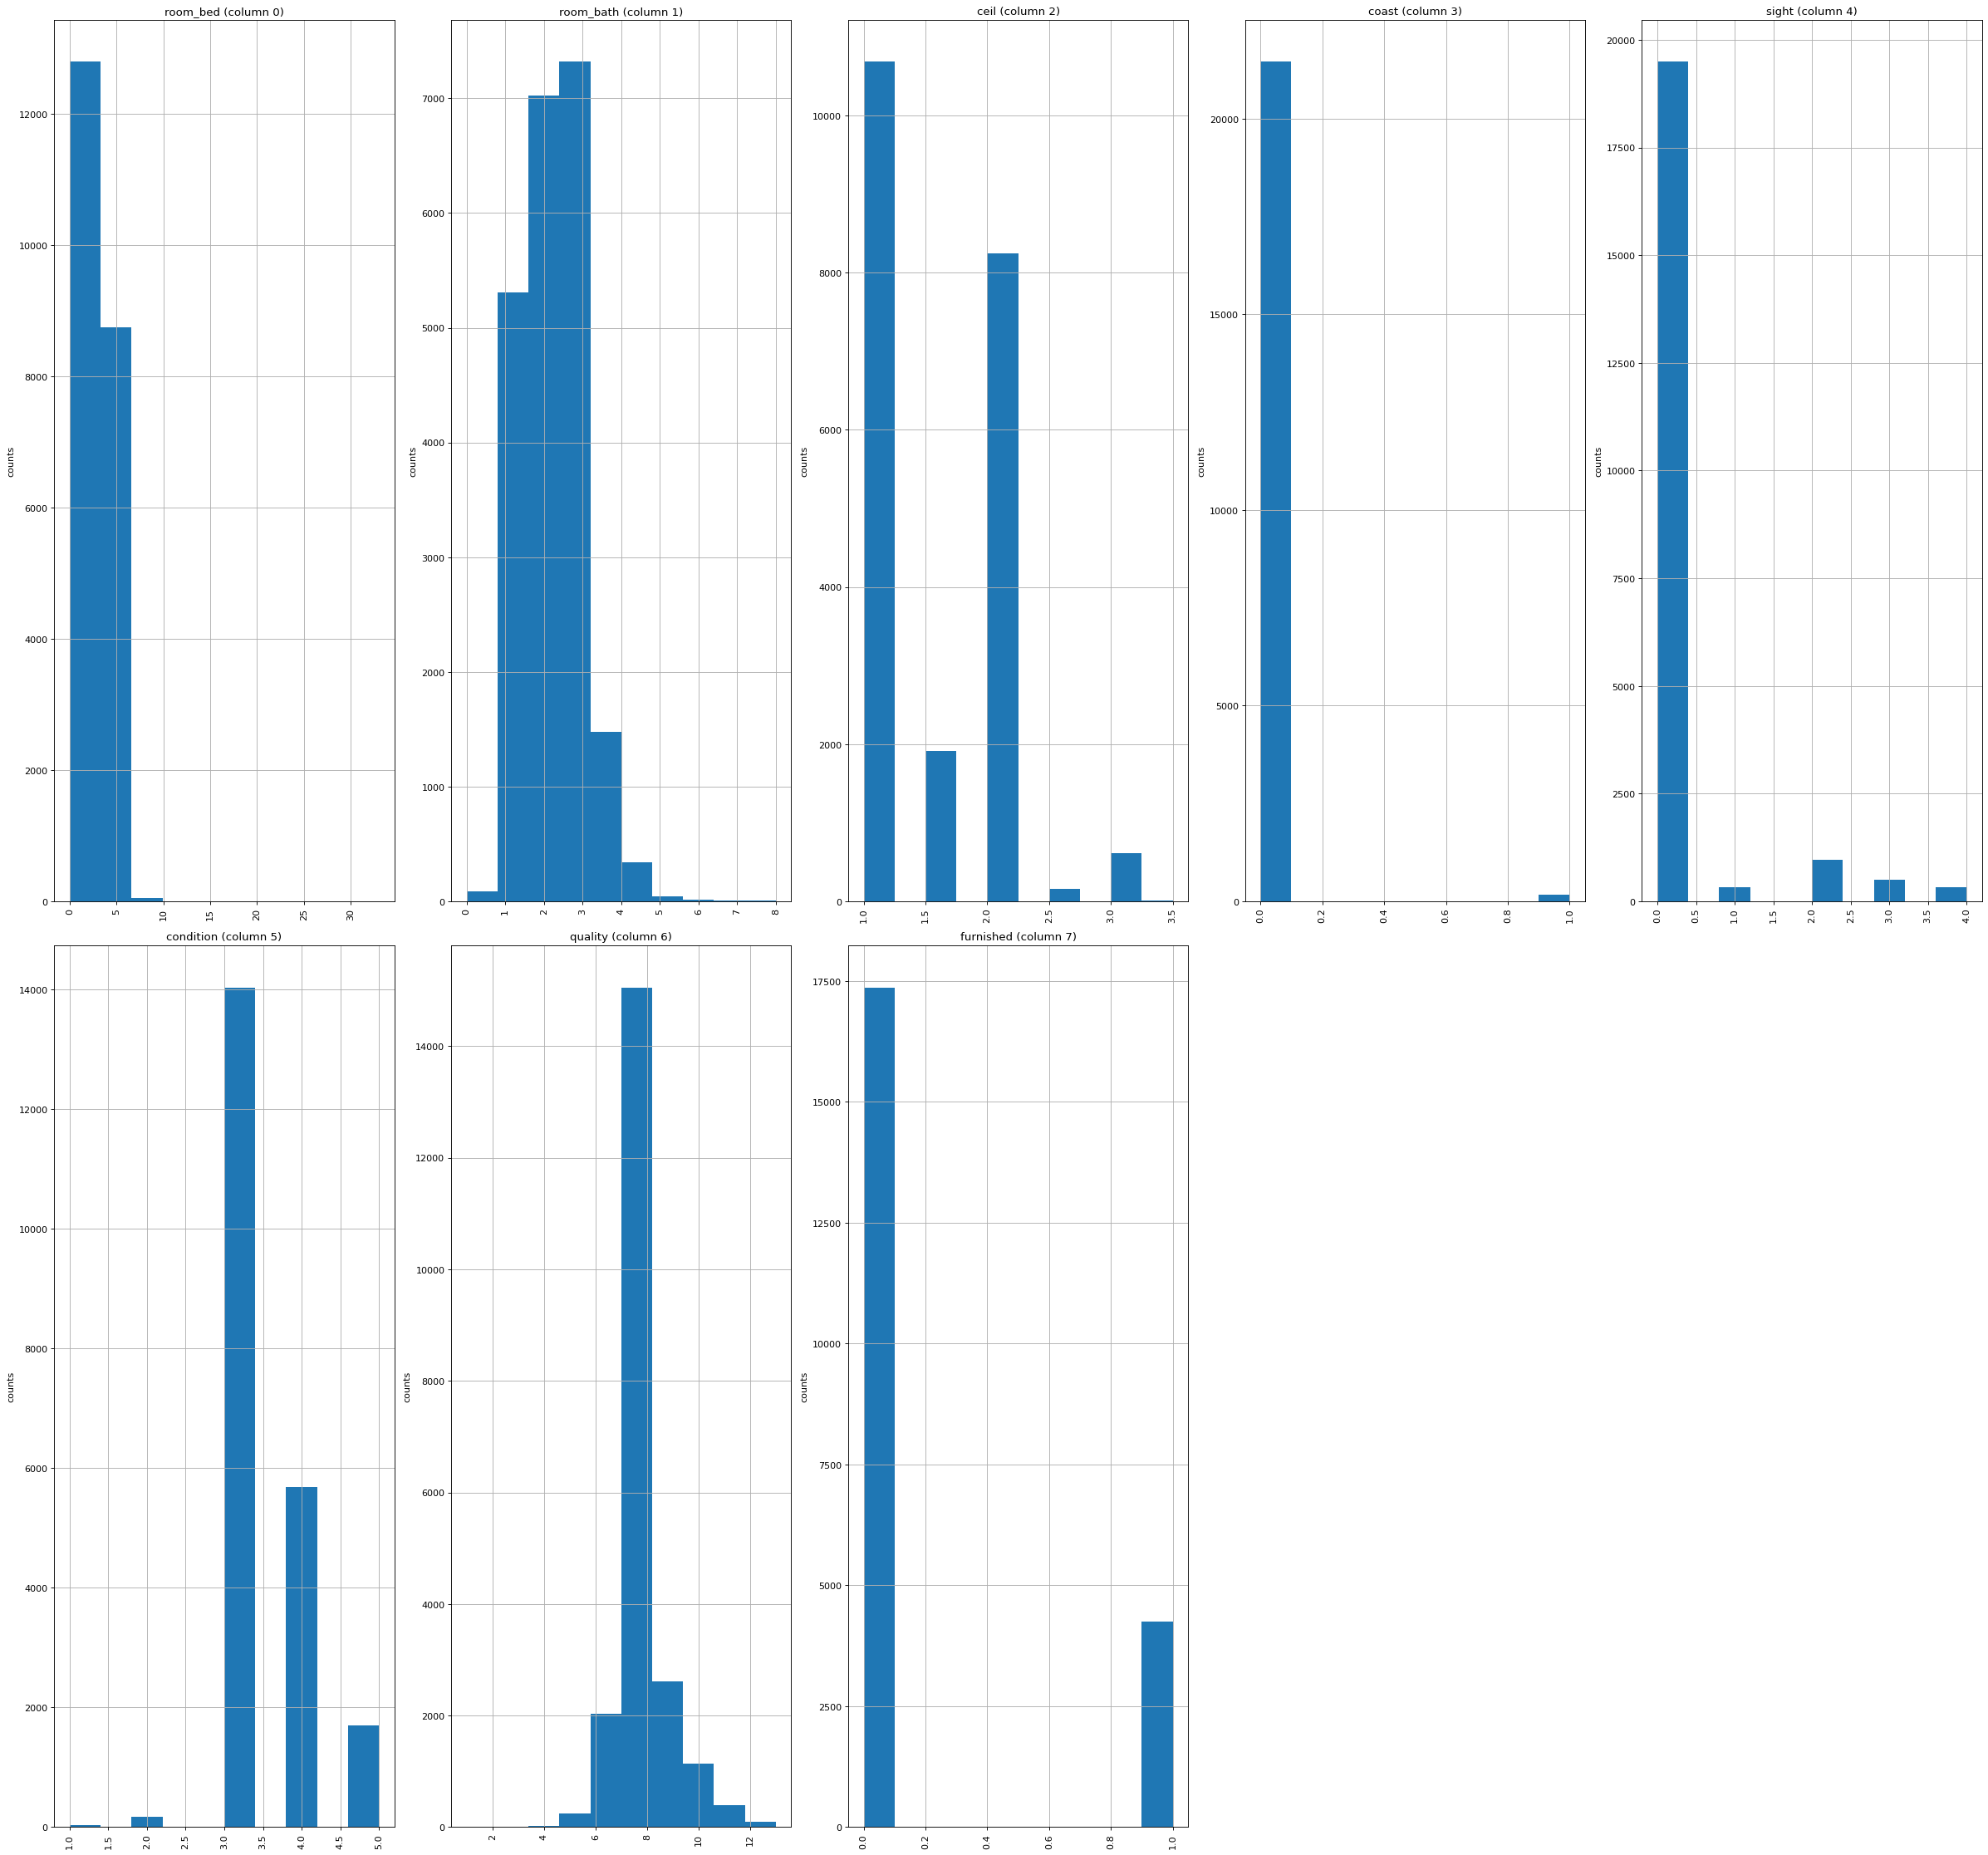

In [32]:
plotPerColumnDistribution(df1, 8, 5)

### Scatter plot and density plot

In [33]:
# Scatter plot is used to understand relationship between two different attributes in the dataset. 
# Below we have compared PRICE (target) vs each of the attribute in the dataset.
# Density plot is univariate plot that draws a histogram of the data distribution & fits a Kernel Density Estimate (KDE)

In [34]:
# Scatter and density plots

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

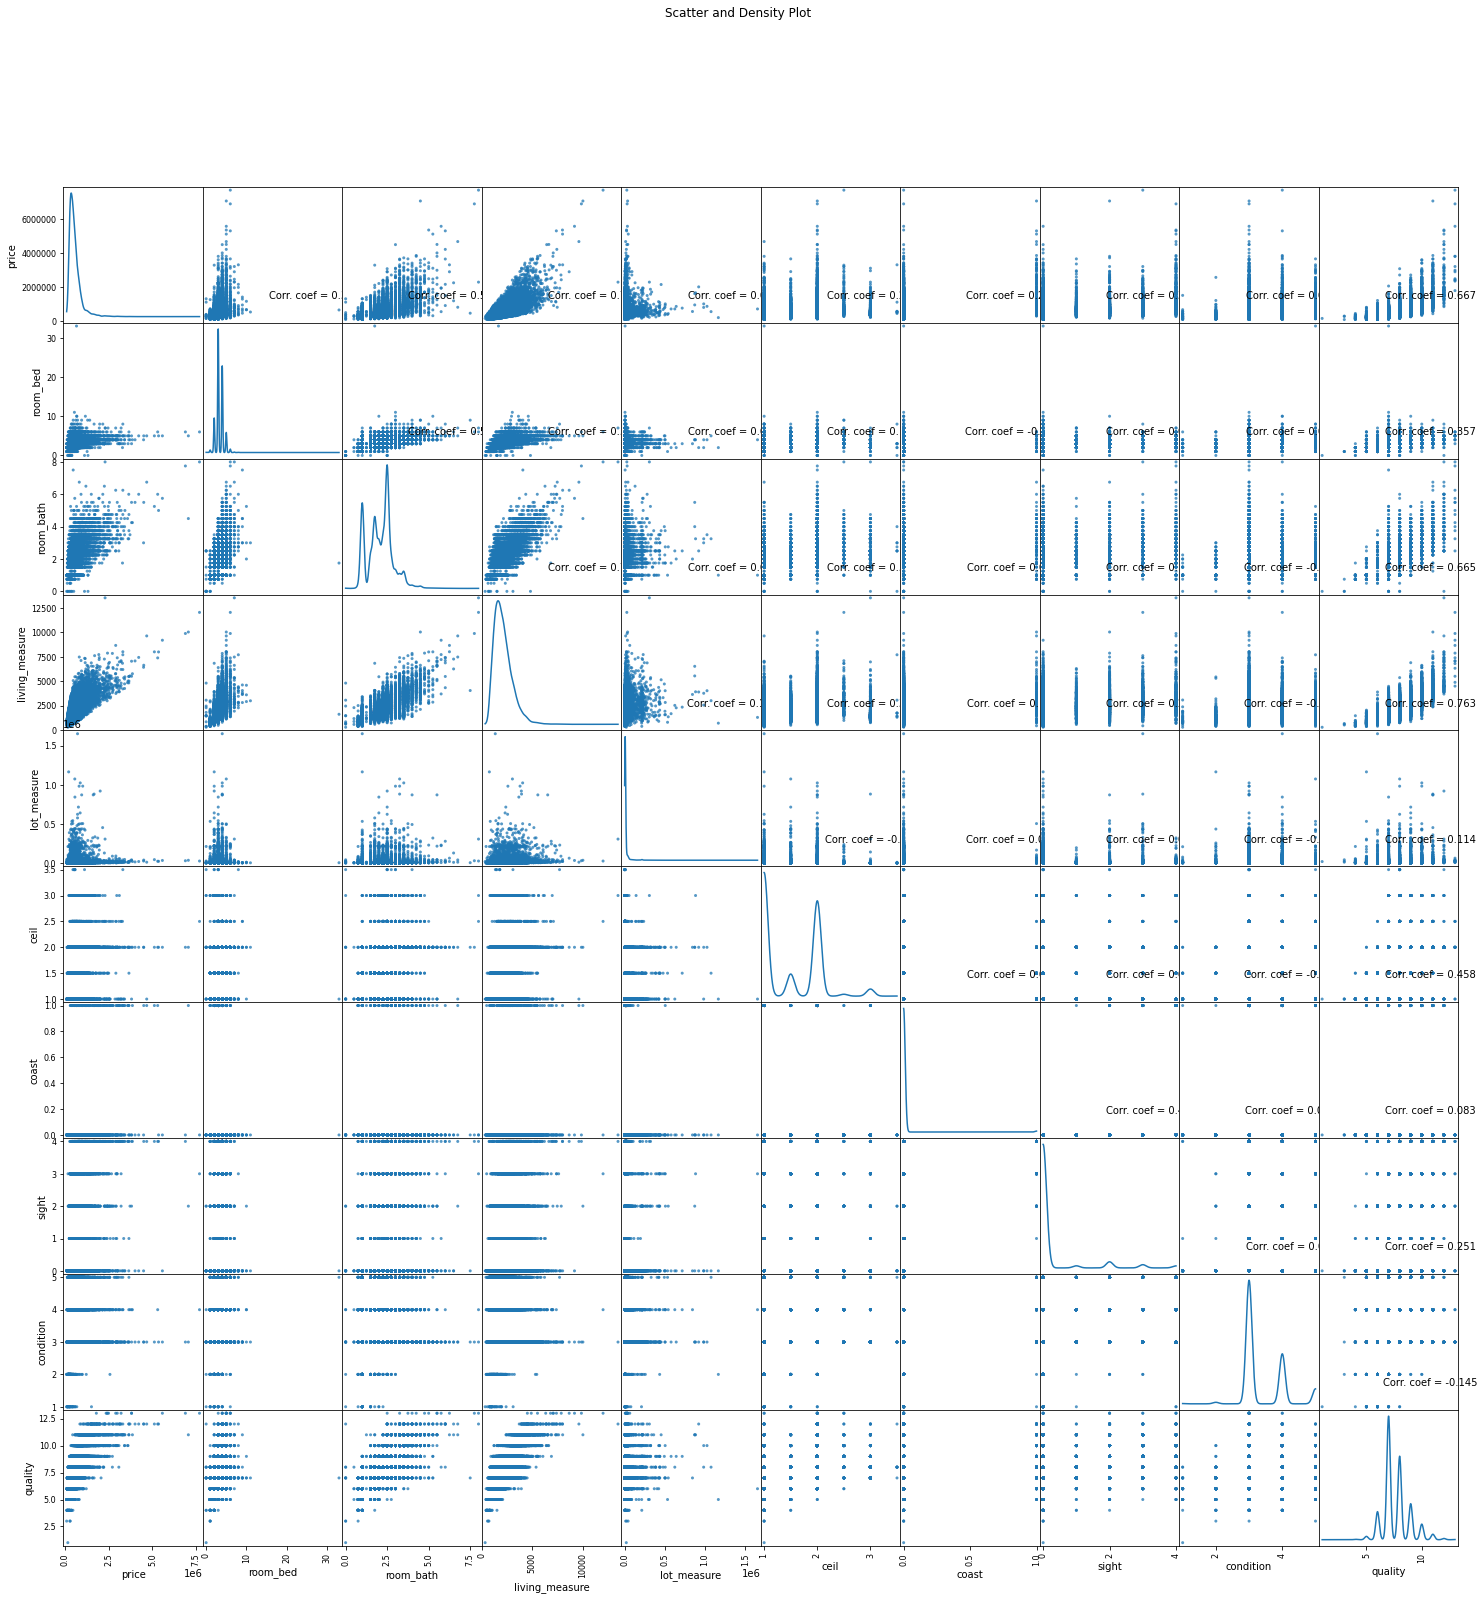

In [35]:
plotScatterMatrix(df1, 25, 10)

In [36]:
### Missing data

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. 
This can prevent us from proceeding with the analysis. 
Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

To find if a column in our dataset has missing values, you can use pd.isnull(df).any() which returns a boolean for each 
column in the dataset that tells if the column contains any missing value. In this dataset, there are no missing values!

In [37]:
#missing data
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
is_renovated,0,0.0
condition,0,0.0
room_bed,0,0.0
room_bath,0,0.0
living_measure,0,0.0
lot_measure,0,0.0
ceil,0,0.0
coast,0,0.0
sight,0,0.0
quality,0,0.0


In [38]:
print(pd.isnull(df1).any())

price               False
room_bed            False
room_bath           False
living_measure      False
lot_measure         False
ceil                False
coast               False
sight               False
condition           False
quality             False
ceil_measure        False
basement            False
living_measure15    False
lot_measure15       False
furnished           False
total_area          False
region code         False
years old           False
is_renovated        False
dtype: bool


In [39]:
#### No null values in the dataframe.
#### The distribution seems to be right skewed for most of the columns

### Get Dummies for Categorical Columns

In [40]:
df_categorical=pd.get_dummies(df1[['ceil','coast','condition','quality','furnished','region code']], prefix_sep='_',columns=['ceil','coast','condition','quality','furnished','region code'], drop_first=True)#getting dummies for numeric categorical variables

In [41]:
df_categorical['is_renovated']=df1['is_renovated']
df_categorical.columns

Index(['ceil_1.5', 'ceil_2.0', 'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'coast_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'quality_3',
       'quality_4', 'quality_5', 'quality_6', 'quality_7', 'quality_8',
       'quality_9', 'quality_10', 'quality_11', 'quality_12', 'quality_13',
       'furnished_1', 'region code_2', 'region code_3', 'region code_4',
       'region code_5', 'region code_6', 'region code_7', 'region code_8',
       'region code_9', 'region code_10', 'is_renovated'],
      dtype='object')

In [42]:
from sklearn.preprocessing import MinMaxScaler
Y=df1[['price']]
X_num=df1.drop(['price','ceil','coast','condition','quality','furnished','region code','is_renovated'],axis=1)#getting only numerical attribultes
scaler = MinMaxScaler()
for col in X_num:
    X_num[col] = scaler.fit_transform(X_num[[col]])
X=pd.concat([X_num,df_categorical],axis=1)
X.columns

Index(['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'sight',
       'ceil_measure', 'basement', 'living_measure15', 'lot_measure15',
       'total_area', 'years old', 'ceil_1.5', 'ceil_2.0', 'ceil_2.5',
       'ceil_3.0', 'ceil_3.5', 'coast_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'quality_3', 'quality_4', 'quality_5',
       'quality_6', 'quality_7', 'quality_8', 'quality_9', 'quality_10',
       'quality_11', 'quality_12', 'quality_13', 'furnished_1',
       'region code_2', 'region code_3', 'region code_4', 'region code_5',
       'region code_6', 'region code_7', 'region code_8', 'region code_9',
       'region code_10', 'is_renovated'],
      dtype='object')

In [43]:
X.drop(['ceil_measure' ,'living_measure15', 'lot_measure15'],axis=1,inplace=True)

In [44]:
X.head(10)

,room_bed,room_bath,living_measure,lot_measure,sight,basement,total_area,years old,ceil_1.5,ceil_2.0,...,region code_2,region code_3,region code_4,region code_5,region code_6,region code_7,region code_8,region code_9,region code_10,is_renovated
4792,0.090909,0.34375,0.126038,0.003556,0.5,0.000000,0.004195,0.991379,1,0,...,0,0,0,0,0,1,0,0,0,0
6973,0.151515,0.12500,0.140377,0.158532,0.0,0.000000,0.159249,0.991379,1,0,...,0,0,1,0,0,0,0,0,0,1
1778,0.090909,0.25000,0.078491,0.003320,0.0,0.145228,0.003577,0.991379,0,0,...,0,0,0,0,1,0,0,0,0,0
21242,0.121212,0.25000,0.104906,0.001995,0.0,0.000000,0.002465,0.991379,0,1,...,0,0,0,0,0,0,1,0,0,0
10241,0.030303,0.12500,0.035472,0.001502,0.0,0.000000,0.001415,0.991379,0,0,...,0,0,0,0,0,1,0,0,0,0
10343,0.151515,0.50000,0.234717,0.002714,0.0,0.224066,0.004225,0.991379,0,1,...,0,0,0,0,1,0,0,0,0,1
17092,0.090909,0.25000,0.095321,0.003653,0.0,0.000000,0.004045,1.000000,0,0,...,1,0,0,0,0,0,0,0,0,1
17081,0.090909,0.25000,0.197736,0.003683,0.0,0.205394,0.004898,0.991379,0,1,...,0,0,0,0,1,0,0,0,0,1
17050,0.121212,0.25000,0.202264,0.002956,0.0,0.000000,0.004207,0.991379,0,0,...,0,0,0,0,1,0,0,0,0,0
16857,0.060606,0.12500,0.023396,0.000594,0.0,0.000000,0.000410,1.000000,0,0,...,1,0,0,0,0,0,0,0,0,0


In [45]:
data = pd.concat([X,Y],axis=1)

In [46]:
data.shape

(21613, 41)

In [47]:
scaler = MinMaxScaler()
Y_log =scaler.fit_transform(Y)

### Splitting into train test split

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split( X, Y_log, test_size = 0.3, random_state = 42 )#splitting data 70:30

<AxesSubplot:>

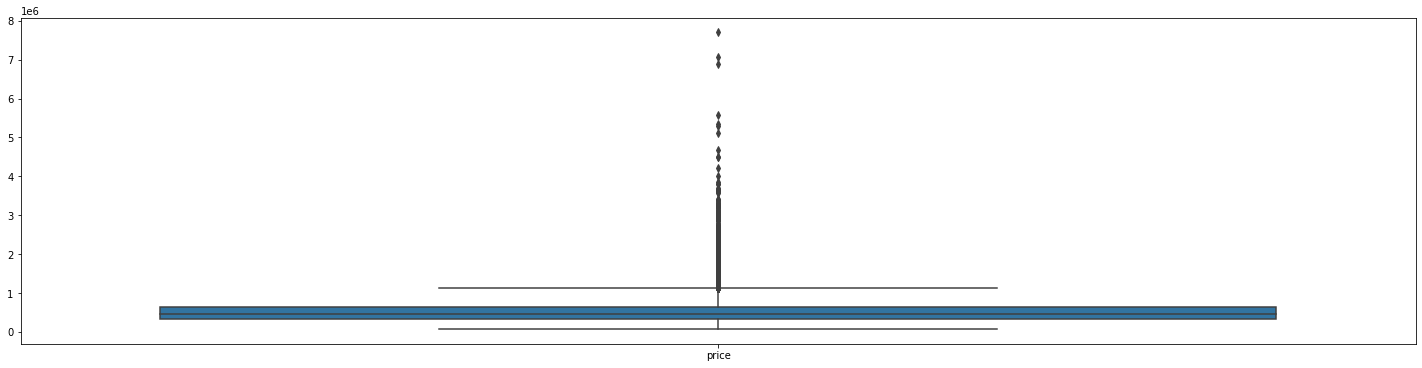

In [49]:
plt.figure(figsize = (25,6))
sns.boxplot(data=Y)

### The target variable has a lot of outliers so tree based models will be a better fit

<AxesSubplot:ylabel='Density'>

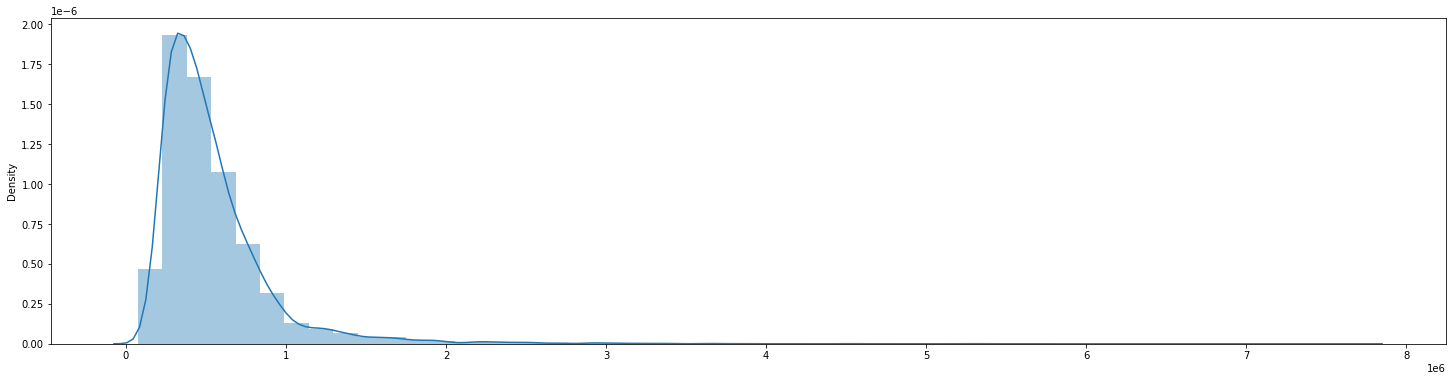

In [50]:
plt.figure(figsize = (25,6))
sns.distplot(Y)

In [51]:
def outliers_checker(var_name,df):
    " Function to check the outliers using IQR method"
    
    q1 = df[var_name].quantile(q = 0.25)
    q3 = df[var_name].quantile(q = 0.75)
    
    IQR = q3 - q1
    
    Lower_W = q1 - 1.5*IQR
    Upper_W = q3 + 1.5*IQR
    
    print("For the attribute "+var_name+" values below {} and above {} are outliers".format(Lower_W,Upper_W))

In [52]:
for col in X.columns:
    print(" Min "+ str(X[col].min())+" max "+ str(X[col].max()))
    outliers_checker(col,X)

 Min 0.0 max 1.0
For the attribute room_bed values below 0.045454545454545456 and above 0.16666666666666669 are outliers
 Min 0.0 max 1.0
For the attribute room_bath values below 0.078125 and above 0.453125 are outliers
 Min 0.0 max 1.0000000000000002
For the attribute living_measure values below -0.041320754716981156 and above 0.29769811320754724 are outliers
 Min 0.0 max 0.9999999999999999
For the attribute lot_measure values below -0.00239393423586431 and above 0.011291228278469312 are outliers
 Min 0.0 max 1.0
For the attribute sight values below 0.0 and above 0.0 are outliers
 Min 0.0 max 1.0
For the attribute basement values below -0.17427385892116182 and above 0.2904564315352697 are outliers
 Min 0.0 max 1.0
For the attribute total_area values below -0.002020001986390799 and above 0.012429779873985304 are outliers
 Min 0.0 max 1.0
For the attribute years old values below -0.41810344827586204 and above 1.1336206896551724 are outliers
 Min 0 max 1
For the attribute ceil_1.5 values

<html><body><h3><U>Training Models</U></h3></body><html>

### Linear Regression

Accuracy on train 0.6992807648974151
Accuracy on test -4.794597835353303e+18
RMSE: 109198096.461839


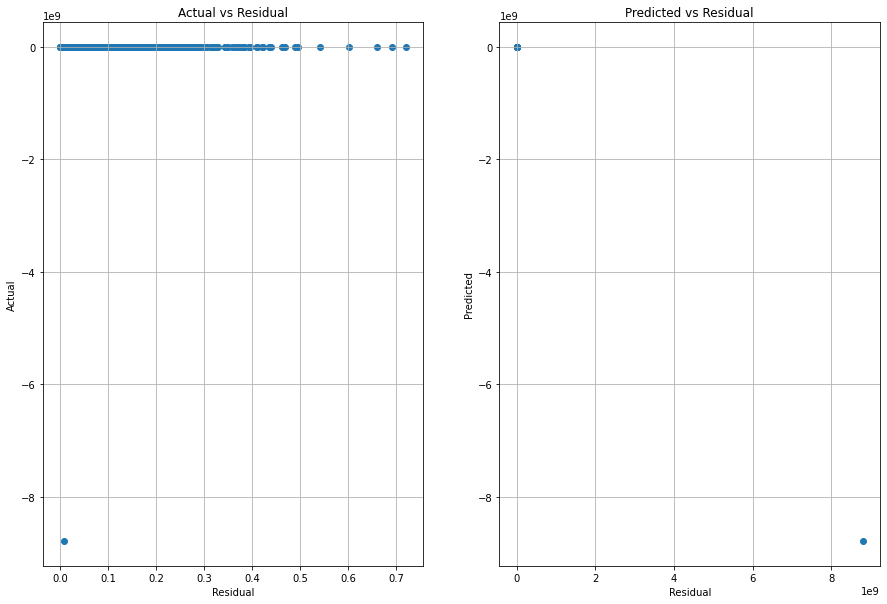

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
preds = regression_model.predict(X_test)
residual = y_test - preds
print("Accuracy on train "+str(regression_model.score(X_train, y_train)))#R square on training set
print("Accuracy on test "+str(regression_model.score(X_test, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(y_test,residual)
plt.title('Actual vs Residual')
plt.xlabel("Residual")
plt.ylabel("Actual")
plt.grid()

plt.subplot(1,2,2)
plt.scatter(preds,residual)
plt.title('Predicted vs Residual')
plt.xlabel("Residual")
plt.ylabel("Predicted")
plt.grid()
plt.show()

### Adding Polynomial Interactions

Accuracy on train 0.7858321665941175
Accuracy on test 0.7554119508034198
RMSE: 0.024664


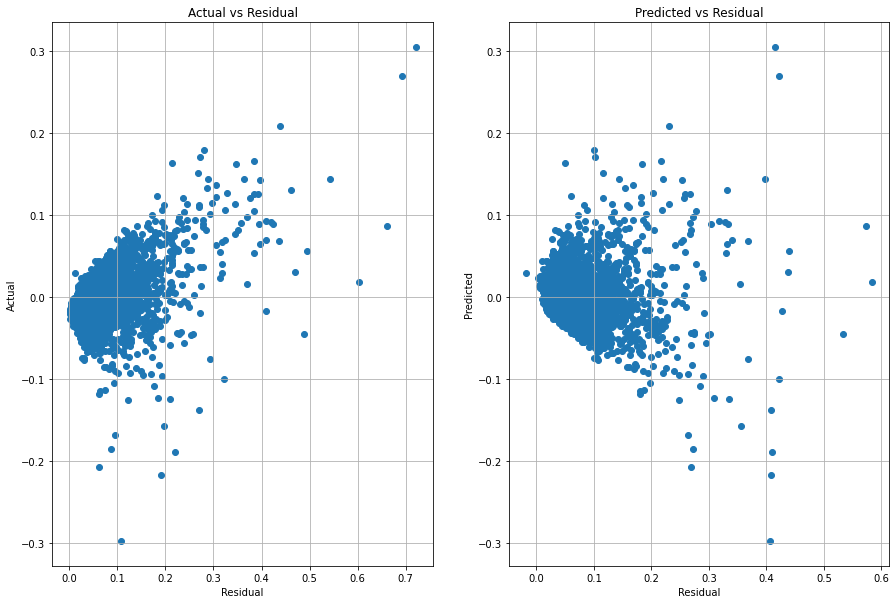

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=False)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.Ridge()

poly_clf.fit(X_train2, y_train)

preds = poly_clf.predict(X_test2)

residual = y_test - preds

print("Accuracy on train "+str(poly_clf.score(X_train2, y_train)))#R square on training set
print("Accuracy on test "+str(poly_clf.score(X_test2, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))



fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(y_test,residual)
plt.title('Actual vs Residual')
plt.xlabel("Residual")
plt.ylabel("Actual")
plt.grid()

plt.subplot(1,2,2)
plt.scatter(preds,residual)
plt.title('Predicted vs Residual')
plt.xlabel("Residual")
plt.ylabel("Predicted")
plt.grid()
plt.show()

### SVR Algorithm

In [55]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
clr = svm.SVR()
clr.fit(X_train_sc,y_train)
preds = clr.predict(X_test_sc)
residual = y_test - preds
print("Accuracy on train "+str(clr.score(X_train_sc, y_train)))#R square on training set
print("Accuracy on test "+str(clr.score(X_test_sc, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


Accuracy on train -0.4178582909695616
Accuracy on test -0.35339813507186224
RMSE: 0.058017


### Decision Tree Regressor

In [56]:
from sklearn.tree import DecisionTreeRegressor
dt_model =  DecisionTreeRegressor( random_state = 100,max_depth=5, min_samples_leaf=5)
dt_model.fit(X_train, y_train)
preds = dt_model.predict(X_test)
print("Accuracy on train "+str(dt_model.score(X_train, y_train)))#R square on training set
print("Accuracy on test "+str(dt_model.score(X_test, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

residual = y_test - preds


Accuracy on train 0.6577458334392565
Accuracy on test 0.6475985123329521
RMSE: 0.029605


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(max_depth = 10, min_samples_leaf=5,min_samples_split=5)
rfcl = rfcl.fit(X_train, y_train)
preds = rfcl.predict(X_test)
print("Accuracy on train "+str(rfcl.score(X_train, y_train)))#R square on training set
print("Accuracy on test "+str(rfcl.score(X_test, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

residual = y_test - preds


Accuracy on train 0.809326417811854
Accuracy on test 0.7474722642936005
RMSE: 0.025061


### Ridge Model

In [58]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {"alpha":[0.1,0.3,0.5,0.8]}
ridge = Ridge()
model1 = GridSearchCV(ridge, param_grid=params, cv = 10,)
model1.fit(X_train, y_train)

print(f"Best Hyper Parameters:\n\n{model1.best_params_}")
print("Accuracy on train "+str(model1.score(X_train,y_train)))
print("Accuracy on test "+str(model1.score(X_test,y_test)))

Best Hyper Parameters:

{'alpha': 0.8}
Accuracy on train 0.6991104619099653
Accuracy on test 0.7100131123573918


### Lasso Model

In [59]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params = {"alpha":[0.1,0.3,0.5,0.8]}
lasso = Lasso()
model2 = GridSearchCV(lasso, param_grid=params, cv = 10)

model2.fit(X_train, y_train)

print(f"Best Hyper Parameters:\n\n{model2.best_params_}")
print("Accuracy on train "+str(model2.score(X_train,y_train)))
print("Accuracy on test "+str(model2.score(X_test,y_test)))

Best Hyper Parameters:

{'alpha': 0.1}
Accuracy on train 0.0
Accuracy on test -0.00038164831443943115


# GradientBoostingRegressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()

model = gbm.fit(X_train, y_train)
preds = model.predict(X_test)

print("Accuracy on train "+str(model.score(X_train, y_train)))
print("Accuracy on test "+str(model.score(X_test,y_test)))
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

residual = y_test - preds


Accuracy on train 0.7834077340299184
Accuracy on test 0.7479574056331642
RMSE: 0.025037


# AdaBcoostRegressor

In [61]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50,base_estimator=RandomForestRegressor(max_depth = 10, min_samples_leaf=5,min_samples_split=5)
                        ,learning_rate=1,loss='square')

model = ada.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy on train "+str(model.score(X_train, y_train)))
print("Accuracy on test "+str(model.score(X_test,y_test)))
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

residual = y_test - preds
print(residual.shape)

Accuracy on train 0.8472133421535106
Accuracy on test 0.7271306250813268
RMSE: 0.026051
(6484, 6484)


# xgboost

In [62]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor()

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

print(xg_reg.score(X_train,y_train))
print(xg_reg.score(X_test,y_test))

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


0.9134777905432464
0.7654921016080456
RMSE: 0.024150


### Cluster Analysis to check mix up of gaussians

In [63]:
from sklearn.cluster import KMeans
cluster_range = range( 2, 6 )   # expect 3 to 5 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1.354516e+15
1,3,7.311899e+14
2,4,4.607593e+14
3,5,3.244712e+14


### With such huge cluster errors , it is evident that , There are no clear clusters in the data set

## PCA

In [64]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X,rowvar=False)
print(cov_matrix)

[[ 0.00079432  0.00139972  0.00112658 ... -0.00015378 -0.00013296
   0.00010523]
 [ 0.00139972  0.00926799  0.00503596 ... -0.00196128 -0.00062822
   0.00097378]
 [ 0.00112658  0.00503596  0.00480475 ... -0.00068881 -0.00036806
   0.00076857]
 ...
 [-0.00015378 -0.00196128 -0.00068881 ...  0.04580585 -0.00163203
   0.00101884]
 [-0.00013296 -0.00062822 -0.00036806 ... -0.00163203  0.03276608
   0.00037025]
 [ 0.00010523  0.00097378  0.00076857 ...  0.00101884  0.00037025
   0.04050285]]


<html>
    <body>
    <br><br>
    <h3> Identify eigen values and eigen vector</h3>
    </body>
</html>


In [66]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 7.82710452e-03  6.58681125e-03 -7.25459184e-03 ... -1.32324819e-03
  -1.63433804e-15  1.25983215e-14]
 [ 7.26341470e-02  3.12428154e-02 -2.72117384e-02 ... -5.67533150e-04
   2.78220490e-15  6.56375181e-15]
 [ 4.66175241e-02  3.16692357e-02 -3.79500112e-02 ... -5.15783027e-04
   3.02474025e-04  5.66899336e-03]
 ...
 [-2.10516181e-02 -7.90081415e-03  1.14612571e-02 ...  3.78419821e-06
  -3.25777253e-16  5.18600076e-18]
 [-1.08836234e-02 -7.39577750e-03 -2.96585766e-03 ...  4.62116832e-06
  -9.75101767e-17 -1.24361171e-16]
 [ 6.07094019e-03 -1.63005084e-02  1.15280684e-02 ...  5.38541144e-05
  -6.96484829e-17 -4.32298448e-17]]

 Eigen Values 
%s [ 5.42416131e-01  3.25619044e-01  2.96034991e-01  2.26125936e-01
  1.76502184e-01  1.60569648e-01  1.14452476e-01  1.05451398e-01
  1.01500092e-01  8.07281467e-02  7.32945454e-02  6.86618708e-02
  6.05409328e-02  5.03296934e-02  4.53802767e-02  3.68583755e-02
  3.31193428e-02  2.81227440e-02  2.28743775e-02  2.00068526e-02
  

In [67]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 20.45343778  32.73188688  43.89477995  52.42154104  59.07708876
  65.1318521   69.44762822  73.42399153  77.25135894  80.29545743
  83.05924954  85.64835266  87.93123131  89.82906434  91.54026468
  92.930121    94.17898581  95.23943877  96.10198624  96.85640502
  97.45535862  97.92803466  98.31805905  98.69742529  99.00481211
  99.27620694  99.50121356  99.68591403  99.78708861  99.84752497
  99.89308928  99.92644866  99.95207691  99.96711118  99.98087003
  99.99363019  99.99975547 100.         100.         100.        ]


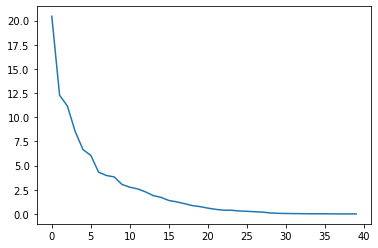

In [68]:
plt.plot(var_exp)


### We will proceed with 16 components here. As with 3 components , 95% of the variance is explained.

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
data_reduced = pca.fit_transform(X)
print(pca.components_)
Xpca = pca.transform(X)

[[-7.82710454e-03 -7.26341471e-02 -4.66175241e-02 -2.08894444e-03
  -2.05881383e-02  1.48336790e-02 -2.46251483e-03  2.18924764e-01
   1.02255639e-01 -4.82603633e-01 -1.26137061e-03 -1.31294236e-02
  -8.31590234e-05 -3.15013025e-03  7.79918003e-03 -4.53504109e-01
   3.66603063e-01  7.77729942e-02  5.99274956e-05  8.07719275e-04
   7.80965230e-03  6.72056905e-02  3.99116780e-01 -1.65404152e-01
  -1.94724517e-01 -8.05715607e-02 -2.75860154e-02 -6.00797987e-03
  -7.33676030e-04 -3.09623749e-01 -4.22661424e-02 -5.43263798e-02
  -7.99399004e-02 -7.32872186e-03  9.17603687e-02  3.54177246e-02
   2.06922196e-02  2.10516181e-02  1.08836234e-02 -6.07094017e-03]
 [ 6.58681112e-03  3.12428147e-02  3.16692352e-02  2.99916428e-03
   4.75257291e-02  1.79670512e-02  3.25256639e-03 -5.96128353e-03
  -1.31550344e-02  9.08209987e-02  4.90314413e-03 -1.08011771e-02
  -5.83264962e-05  7.65016559e-03  1.50953284e-03 -5.13577075e-01
   4.80533639e-01  3.08179642e-02  5.07208936e-05  8.00362530e-04
   7.6832

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split( Xpca, Y_log, test_size = 0.3, random_state = 42 )#splitting data 70:30

<html><body><h3><U>Training Models</U></h3></body><html>

### Linear Regression

Accuracy on train 0.499930130908092
Accuracy on test 0.5001493477968786
RMSE: 0.035258


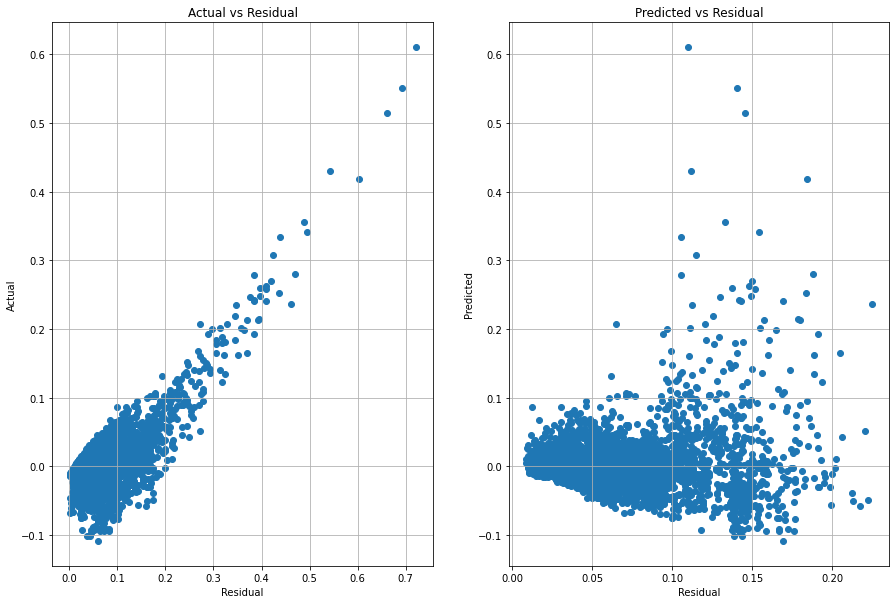

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
preds = regression_model.predict(X_test)
residual = y_test - preds
print("Accuracy on train "+str(regression_model.score(X_train, y_train)))#R square on training set
print("Accuracy on test "+str(regression_model.score(X_test, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(y_test,residual)
plt.title('Actual vs Residual')
plt.xlabel("Residual")
plt.ylabel("Actual")
plt.grid()

plt.subplot(1,2,2)
plt.scatter(preds,residual)
plt.title('Predicted vs Residual')
plt.xlabel("Residual")
plt.ylabel("Predicted")
plt.grid()
plt.show()

### Adding Polynomial Interactions

Accuracy on train 0.6460338864647726
Accuracy on test 0.6489459899012721
RMSE: 0.029548


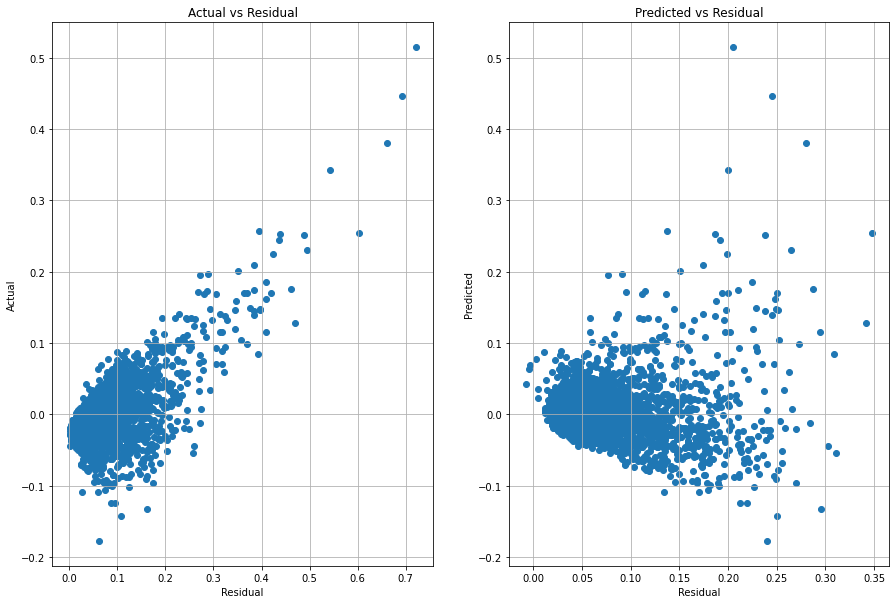

In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=False)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.Ridge()

poly_clf.fit(X_train2, y_train)

preds = poly_clf.predict(X_test2)

residual = y_test - preds

print("Accuracy on train "+str(poly_clf.score(X_train2, y_train)))#R square on training set
print("Accuracy on test "+str(poly_clf.score(X_test2, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))



fig = plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.scatter(y_test,residual)
plt.title('Actual vs Residual')
plt.xlabel("Residual")
plt.ylabel("Actual")
plt.grid()

plt.subplot(1,2,2)
plt.scatter(preds,residual)
plt.title('Predicted vs Residual')
plt.xlabel("Residual")
plt.ylabel("Predicted")
plt.grid()
plt.show()

### SVR Algorithm

In [74]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
clr = svm.SVR()
clr.fit(X_train_sc,y_train)
preds = clr.predict(X_test_sc)
residual = y_test - preds
print("Accuracy on train "+str(clr.score(X_train_sc, y_train)))#R square on training set
print("Accuracy on test "+str(clr.score(X_test_sc, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))



Accuracy on train -0.3409969290439454
Accuracy on test -0.25943701054715596
RMSE: 0.055966


### Decision Tree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
dt_model =  DecisionTreeRegressor( random_state = 100,max_depth=5, min_samples_leaf=5)
dt_model.fit(X_train, y_train)
preds = dt_model.predict(X_test)
print("Accuracy on train "+str(dt_model.score(X_train, y_train)))#R square on training set
print("Accuracy on test "+str(dt_model.score(X_test, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

residual = y_test - preds


Accuracy on train 0.55659147886119
Accuracy on test 0.526944709618957
RMSE: 0.034300


### Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(max_depth = 10, min_samples_leaf=5,min_samples_split=5)
rfcl = rfcl.fit(X_train, y_train)
preds = rfcl.predict(X_test)
print("Accuracy on train "+str(rfcl.score(X_train, y_train)))#R square on training set
print("Accuracy on test "+str(rfcl.score(X_test, y_test)))#R square on test set
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

residual = y_test - preds


Accuracy on train 0.7719786821063331
Accuracy on test 0.6432641117938057
RMSE: 0.029786


### Ridge Model

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
params = {"alpha":[0.1,0.3,0.5,0.8]}
ridge = Ridge()
model1 = GridSearchCV(ridge, param_grid=params, cv = 10)
model1.fit(X_train, y_train)

print(f"Best Hyper Parameters:\n\n{model1.best_params_}")
print("Accuracy on train "+str(model1.score(X_train,y_train)))
print("Accuracy on test "+str(model1.score(X_test,y_test)))



Best Hyper Parameters:

{'alpha': 0.8}
Accuracy on train 0.499929998348316
Accuracy on test 0.5001304478333306


### Lasso Model

In [80]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params = {"alpha":[0.1,0.3,0.5,0.8]}
lasso = Lasso()
model2 = GridSearchCV(lasso, param_grid=params, cv = 10)

model2.fit(X_train, y_train)

print(f"Best Hyper Parameters:\n\n{model2.best_params_}")
print("Accuracy on train "+str(model2.score(X_train,y_train)))
print("Accuracy on test "+str(model2.score(X_test,y_test)))

Best Hyper Parameters:

{'alpha': 0.1}
Accuracy on train 0.0
Accuracy on test -0.00038164831443943115


# GradientBoostingRegressor

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor()

model = gbm.fit(X_train, y_train)
preds = model.predict(X_test)

print("Accuracy on train "+str(model.score(X_train, y_train)))
print("Accuracy on test "+str(model.score(X_test,y_test)))
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

residual = y_test - preds

Accuracy on train 0.6930527297530618
Accuracy on test 0.6247582826237349
RMSE: 0.030549


# AdaBcoostRegressor

In [82]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=60,base_estimator=RandomForestRegressor(max_depth = 10, min_samples_leaf=5,min_samples_split=5)
                        ,learning_rate=1,loss='square')

model = ada.fit(X_train, y_train)

preds = model.predict(X_test)

print("Accuracy on train "+str(model.score(X_train, y_train)))
print("Accuracy on test "+str(model.score(X_test,y_test)))
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

residual = y_test - preds
print(residual.shape)



Accuracy on train 0.821016817459532
Accuracy on test 0.6409270943500633
RMSE: 0.029883
(6484, 6484)


# xgboost

In [83]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor()

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

print(xg_reg.score(X_train,y_train))
print(xg_reg.score(X_test,y_test))

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))


0.8908719052087086
0.6594556274529793
RMSE: 0.029102


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split( X, Y_log, test_size = 0.3, random_state = 67 )#splitting data 70:30

# Hyper Parameter tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [86]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [87]:

rf = RandomForestRegressor()
# Number of trees in random forest
n_estimators = [64 ,76,88,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,6,10]
# max_depth.append(None)

# Minimum number of samples required at each leaf node
min_samples_leaf =rf_random.best_params_ [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}


rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, 
                               n_jobs=20)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=20,
             param_grid={'max_depth': [2, 4, 6, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [64, 76, 88, 100]},
             verbose=2)

In [88]:
rf_random.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 64}

In [89]:
print("Accuracy on train "+str(rf_random.score(X_train,y_train)))
print("Accuracy on test "+str(rf_random.score(X_test,y_test)))

Accuracy on train 0.8521471279253753
Accuracy on test 0.7436521531773237


In [90]:
xgb1 = XGBRegressor()
parameters = {
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [2,5,7,8,10],
              'n_estimators': [50,100,150,200]}

xgb_grid = RandomizedSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=1,n_iter=100)

xgb_grid.fit(X_train,
         y_train)



Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.7545524489981776
{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.07}


In [92]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(booster='dart',verbosity=1, nthread=4,n_estimators=200,
                      max_depth=5, learning_rate=0.07, eval_metric='rmse',
                      rate_drop=0.01,normalize_type='forest')

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

print(xg_reg.score(X_train,y_train))
print(xg_reg.score(X_test,y_test))

0.8523528285275317
0.771905252846148


### Building Pipelines

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer

In [94]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
class custom_transformer():
    
    def __init__(self,percentile=0.95):
        self.percentile = percentile
    
    def fit(self, X, Y):
        return self

    def transform_test(self, X):# transforming test data so that the column structue of test data is concurrent with our model
        try:
            df_categorical=self.transform_categorical(X)#getting dummies for numeric categorical variables
            df_num = X.drop(['ceil','coast','condition','quality','furnished','region code','is_renovated'],axis=1)
            with open("x_scaler.pkl", "rb") as infile:
                scaler = pickle.load(infile)
                df_num[['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'sight','basement', 'total_area', 'years old']] = scaler.transform(df_num[['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'sight','basement', 'total_area', 'years old']])
            X=pd.concat([df_num,df_categorical],axis=1)
            return X
        except Exception as err:
            print('MyFeatureSelector.transform(): {}'.format(err))
            
    def transform_categorical(self,X):
        try:
            df_categorical=X[['ceil','coast','condition','quality','furnished','region code']]
            columns=""
            with open("columns.json","r") as json_file:
                columns = json.load(json_file)["cols"]
            row_count=-1
            for i,rows in df_categorical.iterrows():
                row_count+=1
                for col in df_categorical:
                    for c in columns:
                        if col !=list(c.keys())[0].split('_')[0]:continue
                        if str(df_categorical[col].iloc[0]) == c[list(c.keys())[0]]:
                            df_categorical[list(c.keys())[0]]=""
                            df_categorical[list(c.keys())[0]].iloc[row_count]=1
                        else:
                            df_categorical[list(c.keys())[0]]=""
                            df_categorical[list(c.keys())[0]].iloc[row_count]=0
            df_categorical['is_renovated']=X['is_renovated']
            return df_categorical.drop(['ceil','coast','condition','quality','furnished','region code'],axis=1)
        except Exception as err:
             print('MyFeatureSelector.transform(): {}'.format(err))
                
    def get_region_code(self,df1):
        try:
            df1['region code']=int(0)
            for index,row in df1.iterrows():
                if row["zipcode"]%1000 in range(0,20):
                    df1.at[index,'region code'] =int(1)
                elif row["zipcode"]%1000 in range(20,40):
                    df1.at[index,'region code'] =int(2)
                elif row["zipcode"]%1000 in range(40,60):
                    df1.at[index,'region code'] =int(3)
                elif row["zipcode"]%1000 in range(60,80):
                    df1.at[index,'region code'] =int(4)
                elif row["zipcode"]%1000 in range(80,100):
                    df1.at[index,'region code'] =int(5)
                elif row["zipcode"]%1000 in range(100,120):
                    df1.at[index,'region code'] =int(6)
                elif row["zipcode"]%1000 in range(120,140):
                    df1.at[index,'region code'] =int(7)
                elif row["zipcode"]%1000 in range(140,160):
                    df1.at[index,'region code'] =int(8)
                elif row["zipcode"]%1000 in range(160,180):
                    df1.at[index,'region code'] =int(9)
                elif row["zipcode"]%1000 in range(180,200):
                    df1.at[index,'region code'] =int(10)
        except Exception as err:
            print('MyFeatureSelector.transform(): {}'.format(err))
            
    def get_renovation_feature(self,df1):
        try:
            df1['is_renovated'] =int(0)
            for index,row in df1.iterrows():
                if row['yr_renovated']!=int(0):
                    df1.at[index,'is_renovated']=int(1)
        except Exception as err:
            print('MyFeatureSelector.transform(): {}'.format(err))

    def get_duration_fearure(self,df1):
        try:
            df1['years old']=int(0)
            for index,row in df1.iterrows():
                df1.at[index,'years old']=int(row['dayhours'].strftime('%Y'))-row['yr_built']

        except Exception as err:
            print('MyFeatureSelector.transform(): {}'.format(err)) 

    def drop_columns(self,data,columns,inplace):
        try:
            data.drop(columns,axis=1,inplace=inplace)
        except Exception as err:
            print('MyFeatureSelector.transform(): {}'.format(err))

### Train Model

In [95]:
df1 = pd.read_csv('innercity.csv', delimiter=',')

In [96]:
c1=custom_transformer()
c1.get_region_code(df1)
df1.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,region code
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,1956,0,98133,47.7174,-122.336,2120,7553,1,16477,7
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,1976,0,98023,47.3165,-122.386,2260,8800,0,10050,2
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,2006,0,98038,47.3515,-121.999,2370,4348,0,6694,2
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,1916,0,98133,47.7049,-122.349,1520,3844,0,4664,7
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,1954,0,98115,47.6768,-122.269,1900,5940,0,5450,6


In [97]:
c1.get_renovation_feature(df1)
df1.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,region code,is_renovated
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,...,0,98133,47.7174,-122.336,2120,7553,1,16477,7,0
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,...,0,98023,47.3165,-122.386,2260,8800,0,10050,2,0
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,...,0,98038,47.3515,-121.999,2370,4348,0,6694,2,0
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,...,0,98133,47.7049,-122.349,1520,3844,0,4664,7,0
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,...,0,98115,47.6768,-122.269,1900,5940,0,5450,6,0


In [98]:
df1["dayhours"]=pd.to_datetime(df1['dayhours'])
c1.get_duration_fearure(df1)
df1.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,region code,is_renovated,years old
0,3034200666,2014-11-07,808100,4,3.25,3020,13457,1.0,0,0,...,98133,47.7174,-122.336,2120,7553,1,16477,7,0,58
1,8731981640,2014-12-04,277500,4,2.50,2550,7500,1.0,0,0,...,98023,47.3165,-122.386,2260,8800,0,10050,2,0,38
2,5104530220,2015-04-20,404000,3,2.50,2370,4324,2.0,0,0,...,98038,47.3515,-121.999,2370,4348,0,6694,2,0,9
3,6145600285,2014-05-29,300000,2,1.00,820,3844,1.0,0,0,...,98133,47.7049,-122.349,1520,3844,0,4664,7,0,98
4,8924100111,2015-04-24,699000,2,1.50,1400,4050,1.0,0,0,...,98115,47.6768,-122.269,1900,5940,0,5450,6,0,61


In [100]:
c1.drop_columns(df1,['cid','dayhours','yr_built','yr_renovated','lat','long','zipcode','ceil_measure' ,'living_measure15', 'lot_measure15'],True)

MyFeatureSelector.transform(): "['cid' 'dayhours' 'yr_built' 'yr_renovated' 'lat' 'long' 'zipcode'\n 'ceil_measure' 'living_measure15' 'lot_measure15'] not found in axis"


In [101]:
df1.head()

,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,basement,furnished,total_area,region code,is_renovated,years old
0,808100,4,3.25,3020,13457,1.0,0,0,5,9,0,1,16477,7,0,58
1,277500,4,2.50,2550,7500,1.0,0,0,3,8,800,0,10050,2,0,38
2,404000,3,2.50,2370,4324,2.0,0,0,3,8,0,0,6694,2,0,9
3,300000,2,1.00,820,3844,1.0,0,0,4,6,0,0,4664,7,0,98
4,699000,2,1.50,1400,4050,1.0,0,0,4,8,0,0,5450,6,0,61


In [102]:
df_categorical=pd.get_dummies(df1[['ceil','coast','condition','quality','furnished','region code']], prefix_sep='_',columns=['ceil','coast','condition','quality','furnished','region code'], drop_first=True)
df_categorical['is_renovated']=df1['is_renovated']
df_categorical.columns

Index(['ceil_1.5', 'ceil_2.0', 'ceil_2.5', 'ceil_3.0', 'ceil_3.5', 'coast_1',
       'condition_2', 'condition_3', 'condition_4', 'condition_5', 'quality_3',
       'quality_4', 'quality_5', 'quality_6', 'quality_7', 'quality_8',
       'quality_9', 'quality_10', 'quality_11', 'quality_12', 'quality_13',
       'furnished_1', 'region code_2', 'region code_3', 'region code_4',
       'region code_5', 'region code_6', 'region code_7', 'region code_8',
       'region code_9', 'region code_10', 'is_renovated'],
      dtype='object')

In [103]:
import json
columns={"cols":[{col:col.split('_')[1]} for col in df_categorical]}#categorical columns and their expected values
with open('columns.json','w') as fp:
    json.dump(columns,fp)#dumping to a json file so we can get the categorical columns while forming dummies for our testing data input by user

In [104]:
df_categorical.iloc[0].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

### Scale Data

In [105]:

X_num=df1.drop(['price','ceil','coast','condition','quality','furnished','region code','is_renovated'],axis=1)#dropping target and categorical columns
X_scaler=MinMaxScaler()
X_num[['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'sight',
'basement', 'total_area', 'years old']] = X_scaler.fit_transform(X_num[['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'sight',
'basement', 'total_area', 'years old']])
X_num.head()  

,room_bed,room_bath,living_measure,lot_measure,sight,basement,total_area,years old
0,0.121212,0.40625,0.206038,0.007837,0.0,0.000000,0.009117,0.508621
1,0.121212,0.31250,0.170566,0.004228,0.0,0.165975,0.005225,0.336207
2,0.090909,0.31250,0.156981,0.002304,0.0,0.000000,0.003192,0.086207
3,0.060606,0.12500,0.040000,0.002014,0.0,0.000000,0.001963,0.853448
4,0.060606,0.18750,0.083774,0.002138,0.0,0.000000,0.002439,0.534483


In [106]:
import pickle
with open("x_scaler.pkl", "wb") as outfile:
    pickle.dump(X_scaler, outfile)#dumping the scaler into a pickle file so that , our user input can also be scaled using it

In [107]:
X=pd.concat([X_num,df_categorical],axis=1)

In [108]:
Y=df1[['price']]
scaler = MinMaxScaler()
Y_log =scaler.fit_transform(Y)
with open("y_scaler.pkl", "wb") as outfile:
    pickle.dump(scaler, outfile)

In [109]:
from xgboost import XGBRegressor

model = XGBRegressor(booster='dart',verbosity=1, nthread=4,n_estimators=200,
                      max_depth=5, learning_rate=0.07, eval_metric='rmse',
                      rate_drop=0.01,normalize_type='forest')

In [110]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(model, X, Y_log, cv=cv, n_jobs=-1)

In [111]:
np.average(scores)

0.7636344450743147

### Train the final Model

In [112]:
X_final=X
Y_final= Y_log

In [113]:
model.fit(X_final,Y_final)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.07, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             normalize_type='forest', nthread=4, num_parallel_tree=1,
             random_state=0, rate_drop=0.01, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=1)

In [114]:
pickle.dump(model,open('model.pkl','wb'))

### Preparing a test pipeline , to predict on data input by a user

In [115]:
user_input=[{"dayhours":"20141210T000000","room_bed":int(4),"room_bath":2.00,"living_measure":1550,"lot_measure":8150,"ceil":1.5,"coast":int(0),
"sight":int(1),"condition":int(3),"quality":int(7),"basement":0,"yr_built":int(1951),"yr_renovated":int(0),"zipcode":int(98066),"furnished":int(0),"total_area":8960}]

In [117]:
df1=pd.DataFrame(user_input,columns=user_input[0].keys())

In [118]:
c1=custom_transformer()
c1.get_region_code(df1)
df1.head()

,dayhours,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,basement,yr_built,yr_renovated,zipcode,furnished,total_area,region code
0,20141210T000000,4,2.0,1550,8150,1.5,0,1,3,7,0,1951,0,98066,0,8960,4


In [121]:
c1.get_renovation_feature(df1)
df1.head()

,dayhours,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,basement,yr_built,yr_renovated,zipcode,furnished,total_area,region code,is_renovated,years old
0,2014-12-10,4,2.0,1550,8150,1.5,0,1,3,7,0,1951,0,98066,0,8960,4,0,63


In [122]:
df1["dayhours"]=pd.to_datetime(df1['dayhours'])
c1.get_duration_fearure(df1)
df1.head()

,dayhours,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,basement,yr_built,yr_renovated,zipcode,furnished,total_area,region code,is_renovated,years old
0,2014-12-10,4,2.0,1550,8150,1.5,0,1,3,7,0,1951,0,98066,0,8960,4,0,63


In [123]:
c1.drop_columns(df1,['dayhours','yr_built','yr_renovated','zipcode'],True)

In [124]:
df1.head()

,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,basement,furnished,total_area,region code,is_renovated,years old
0,4,2.0,1550,8150,1.5,0,1,3,7,0,0,8960,4,0,63


In [126]:
X=c1.transform_test(df1)
X

,room_bed,room_bath,living_measure,lot_measure,sight,basement,total_area,years old,ceil_1.5,ceil_2.0,...,region code_2,region code_3,region code_4,region code_5,region code_6,region code_7,region code_8,region code_9,region code_10,is_renovated
0,0.121212,0.25,0.095094,0.004622,0.25,0.0,0.004564,0.551724,1,0,...,0,0,1,0,0,0,0,0,0,0


In [127]:
model=None
with open("model.pkl", "rb") as infile:
    model = pickle.load(infile)
prediction=model.predict(X)
y_scaler=None
with open("y_scaler.pkl", "rb") as infile:
    y_scaler = pickle.load(infile)

price=y_scaler.inverse_transform(prediction.reshape(1, -1))
price_range=str(int(price[0]-20000))+"-"+str(int(price[0]+20000))
price_range

'477888-517888'

<html>
    <body>
    <h3>Final Insights:</h3>
     <p>
         <ul>
         <li> We can infer from the analysis that ,tree based models have given a better performance for our data.</li>
             <li> Xgboost algorithm , seemed the best fit with an accuracy of almost 78% </li>
          <li> Since our target variable had lots of outliers, so tree based model seemed best fit</li>
              <li> The data was also trained against all possible regression algorithms , with proper hyper parameter tuning to yeild the best results.</li>
              <li> Custom pipelines were also built to process the data and feed it into the model</li>
             <li> Use of pickle was demonstrated to serialize models and scalers and apply it on the small testing set , to yeild proper results</li>
             <li> A flask app is also developed so that a user can input values into the model , and get predictions</li>
             <li> The output was given as a price range as an end user .</li>
         </ul>
     </p>
    </body>
</html>